<a href="https://colab.research.google.com/github/ti-molodykh/colab/blob/main/%22%D0%A3%D1%80%D0%BE%D0%BA4%D0%90%D0%91_%D1%84%D0%B8%D0%BD%D0%B0%D0%BB_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt # библиотека для рисования картинок
import seaborn as sns # библиотека для рисования более красивых картинок

import numpy as np # библиотека для простых математических подсчётов. В основном, np.mean - поиск среднего
import random as rnd # библиотека для генерации случаных чисел

from scipy import stats # библиотека, в которой хранятся статистические критериии. К примеру, stats.ttest_ind
from tqdm import tqdm # фишка, которая позволяет лучше контролировать время выполнения программы

Существует 2 стадии: <br>**ПОСЛЕ**: оценка результатов эксперимента после эксперимента. <br> **ДО**: оценка продолжительности эксперимента так, чтобы если результат есть, мы его увидили бы.
<br>Можно мыслить это так, что стадии ДО и ПОСЛЕ проводят 2 разных аналитика(на практике это не так, но бывает)

<h2>Стадия ПОСЛЕ</h2>
<br>Простой ответ: t критерий Стьюдента (t_test)
<br>Если АБ тест завершён,
<br>если у вас УЖЕ есть 2 выборки, в каждой хотя бы по 10 наблюдений
<br>- применяйте Т_тест. Он работает за одну строчку

<h1>Т тест</h1>


In [ ]:
A = [166, 166, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 182, 182]

B = [160, 160, 160, 160, 160, 160, 176, 176, 176, 176, 176, 176, 176]

res = stats.ttest_ind(A, B) # проводим T тест за одну строку

res#.pvalue

Ttest_indResult(statistic=2.1239723203253895, pvalue=0.04374329643819998)

In [ ]:
# пример применения т_критерия
A = [166, 166, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 182, 182] # контрольная

B = [160, 160, 160, 160, 160, 160, 176, 176, 176, 176, 176, 176, 176] # тестовая

res = stats.ttest_ind(A, B) # проводим T тест за одну строку

print(res.pvalue)
# результат t_test - это pvalue

print('В нашем эксперименте p_value получилось', res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
  print('Различие значимое,\n\t потому что p_value маленькое.\n\t\tМаловероятно, что такие различия на таких размерах выборки могли произойти случайно.\nОтвергаем нулевую гипотезу')
else:
  print('Различие незначимое,\n\t потому что p_value большое.\n\t\tВесьма вероятно, что такие различия на таких размерах выборки могли произойти случайно.\nНе можем отвергнуть нулевую гипотезу')

В нашем эксперименте p_value получилось 0.04374329643819998
Различие значимое,
	 потому что p_value маленькое.
		Маловероятно, что такие различия на таких размерах выборки могли произойти случайно.
Отвергаем нулевую гипотезу


In [ ]:
# существуют и другие статистические тесты, они могут выдавать другое pvalue
# обычно другие тесты слабее, t_test
stats.mannwhitneyu(A, B) # тест Мана-Уитни на тех же выборках

MannwhitneyuResult(statistic=98.0, pvalue=0.7424385775504068)

И так, если у вас ФИНАЛЬНО есть две выборки и АБ тест закончился - используйте stats.t_test(A, B)👍👍👍

<h1>Стадия **ДО**</h1>
<br> Бизнес кейс: есть гипотеза, что если расположить пиццы на сайте продажи пиццерии по убыванию цены, то средний чек увеличится.
<br> Поделим клиентов на группы &#127374;
<br> &#127344; - старое расположение товара
<br> &#127345; - новое расположение товара
<br> Для простоты, если Б хуже А, будем воспринимать, что Б и А одинаковые(однохвостововой эксперимент)
<br>Сколько дней нам нужно проводить эксперимент?

Мы не знаем есть ли, на самом деле, клиентам дело до расположения пицц.
<br>Всегда можно сформулировать Н0, она всгда говорит, что ничего не поменялось

**H0:** "расположение пицц никак не влияет на средний чек покупателей. На самом деле, средний чек в группах А и Б одинаковый"

<h3>Реальность и наблюдения могут различаться:&#128548;&#128548;&#128548;<h3>
<br> Мы никак не можем полностю исключить ошибку
<br> род I: даже если H0 верна, и на самом деле, разницы нет,<br>&emsp;&emsp; в эксперименте можем случайно получить значимые различия
<br> род II: даже если H0 ложна, и на самом деле, различия есть,<br>&emsp;&emsp; в эксперименте можем случайно получить не получить существенной разницы

<h1>Ошибка I рода</h1>
Ошибку I рода мы проверим через p_value, в конце эксперимента.
Здесь всё однозначно:

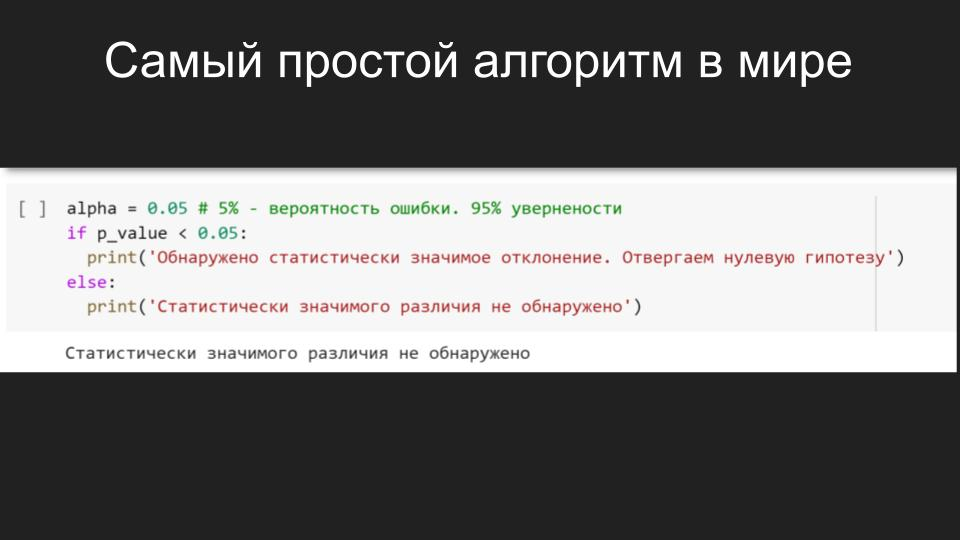

То есть, чем меньше&#128317; p_value, тем меньше&#128317; вероятность совершить ошибку I рода.
<br>Pvalue узнаем по результатам эксперимента.
<br>До начала эксперимента достаточно зафиксировать alpha и об ошибке I рода до окончания эксперимента можно больше не думать&#9989;
<br> Cтандартом индустрии alpha = 5% - допустимая вероятность совершить ошибку I рода

<h1>Ошибка II рода</h1>
С ошибкой II рода всё по-другому: <br>Если расстановка пицц, на самом деле, увеличивает средний чек, мы не хотим, чтобы различия получились статистически не значимыми.

Даже если расстановка пицц, на самом деле, увеличивает средний чек, результат может быть очень маленьким&#128270;, таким, что придётся проводить эксперимент 10 лет, чтобы его увидеть

Давайте проведём симуляцию

Средний чек обычного расположения пицц Н0: 98.24890598504463
Средний чек, предпологаемо увеличится H1: 104.14384034414732
Разница 6%


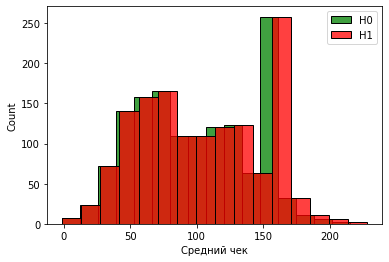

In [ ]:
rnd.seed(0) # строчка нужна чтобы случайные числа были одинаковыми от запуска к запуску
np.random.seed(seed=0) # вторая строка нужная чтобы случайные числа были одинаковыми

true_effect = 0.06 # настоящий эффект увеличения среднего чека, который приносит перестановка пицц. Относительный. Альтерантивная гипотеза mean1 = mean0*(1 + MDE)
# для однохвостового экспемриента на увечичение true_effect >= 0


# средние чеки клиентов на исторических данных компании
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 

# моделируем, что средний чек увеличится на true_effect %. Сможем ли мы обнаружить это увеличение а АБ тесте?
L1 = L0 * (1 + true_effect)

print('Средний чек обычного расположения пицц Н0:', np.mean(L0))
print('Средний чек, предпологаемо увеличится H1:', np.mean(L1))
print(f'Разница {int((np.mean(L1)/np.mean(L0) - 1)*100)}%')

plt.xlabel('Средний чек')
sns.histplot(L0, color='green', label='H0')
sns.histplot(L1, color='red', label='H1')
plt.legend();

Напомним, сейчас стадия планирования эксперимента. Мы не знаем, какой эффект будет, лишь предполагаем значение true_effect. Это значение всегда можно поменять в симуляции

In [ ]:
def one_ab_test(na, nb, La, Lb): # функция симурирует 1 АБ тест
  sub_a = [rnd.choice(La) for _ in range(na)] # из генеральной совокупности La выбираем случайные na элементов
  sub_b = [rnd.choice(Lb) for _ in range(nb)] # из генеральной совокупности Lb выбираем случайные na элементов
  return stats.ttest_ind(sub_a, sub_b).pvalue # проводим Т-тест, узнаём p_value

In [ ]:
rnd.seed(0)
np.random.seed(seed=0)

# к примеру, проведём 1 АБ тест на наших данных и получим p_value
na = 100
nb = 100
pvalue = one_ab_test(na, nb, L0, L1) # L0 и L1 - разные выборки. На самом деле, результат есть. Но не факт, что мы его увидим в эксперименте
print('В результате получили pvalue', pvalue)

alpha = 0.05
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')

В результате получили pvalue 0.6728320317759122
В эксперименте мы не обнаружили значимых различий. Объём выборки маловат


## Промежуточные выводы
Даже если результат **ЕСТЬ** из-за маленькой выборки мы можем его не увидеть &#128542;
<br> Чем меньше ⏬ настоящий эффект от перестановки пиццц, тем дольше⏫ мы должны проводить эксперимент
<br> Какой на самом деле эффект от перестановки пицц мы не узнаем даже после проведения АБ теста
<br> Но если мы зафиксировали время проведения эксперимента, то существует минимальный эффект, который мы сможем обнаружить

*Минимально обнаружимый эффект: **MDE**. При данных alpha, beta, na, nb.* MDE = min(true_effect)
<br>MDE больше - меньше время проведения - меньше затрат - меньше точность
<br>МDE меньше - больше время проведения - больше затрат - больше точность 
<br>Нужно искать золотую середину

## Проведём бесконечно много АБ тестов для данноо true_effect и посмотрим, какие pvalue у нас получились

100%|██████████| 1000/1000 [00:00<00:00, 1136.19it/s]



Ошибку 2 рода мы совершили в 0.723 доле случаев
Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной 0.06


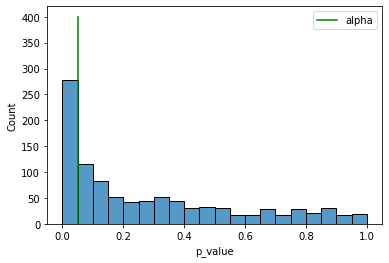

In [ ]:
rnd.seed(0)
np.random.seed(seed=0)

# объём одной выборки. Можно поставить разные na и nb
# количество людей в одной выборке. Не количество дней проведения эксперимента
N = 200

# список все pvalue за все наши симуляции экспериментов
# one_ab_test(na, nb, L0, L1) - чтобы провести эксперимент, в котором различия есть
# one_ab_test(na, nb, L0, L0) - чтобы провести эксперимент, в котором верна H0
p_values = [one_ab_test(N, N, L0, L1) for _ in tqdm(range(1000)) ] 
sns.histplot(p_values, bins=20) # строим гистограмму pvalue в нашей симуляции

alpha = 0.05 # сравниваем с pvalue
beta = 0.20 # 

plt.plot([alpha, alpha], [0, 400], color='green', label='alpha')
plt.xlabel('p_value')

# На самом деле, во всех этих экспериментах эффект от перестановки пицц есть true_effect. На самом деле Н0 ложная.
# То есть было бы правильным решением во всех случаях отклонить нулевую гипотезу
# Но мы не знаем, как на самом деле. Мы имеем только pvalue
# В идеале все pvalue должны быть меньше alpha. Тогда на стадии ПОСЛЕ мы отклоним нулевую гипотезу
# Значит, все pvalue, которые больше alpha - ошибка II рода 
error2 = [pv for pv in p_values if pv > alpha] #p_value, которые приводят к ошибке II рода

# Теперь подбираем такое N, чтобы len(error2)/len(p_values) == beta 
# Такое N и есть нужная продолжительность теста
print('\nОшибку 2 рода мы совершили в', len(error2)/len(p_values), 'доле случаев')

if len(error2)/len(p_values) < beta:
  print('Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать')
else:
  print('Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной', true_effect)
plt.legend();

# Выводы:
Мы научились планировать время проведения АБ теста исходя из 
<br>1) Объёмов выборок na, nb
<br>2) Ожидаемого эффекта, который возможен в тесте true_effect
<br>3) alpha - допустимой величины ошибки I рода
<br>4) beta - допустимой величны ошибки II рода 

# Шаблон АБ теста
# Тот же код. Одна ячейка без графиков и лишних комментариев

In [ ]:
rnd.seed(0)
np.random.seed(seed=0)

true_effect = 0.06
alpha = 0.05
beta = 0.20 
N = 200 

# здесь всё ещё случайное распределение симулирующее средний чек. На практике L0 - ваши исторические данные по этой метрике
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 

L1 = L0 * (1 + true_effect)
p_values = [one_ab_test(N, N, L0, L1) for _ in tqdm(range(1000)) ] 

error2 = [pv for pv in p_values if pv > alpha]

print('\nОшибку 2 рода мы совершили в', len(error2)/len(p_values), 'доле случаев')

if len(error2)/len(p_values) < beta:
  print('Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать')
else:
  print('Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной', true_effect);

100%|██████████| 1000/1000 [00:01<00:00, 599.39it/s]


Ошибку 2 рода мы совершили в 0.723 доле случаев
Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной 0.06


In [ ]:
# фишка, которая позволяет лучше контролировать время выполнения программы
from tqdm import tqdm

X = [i for i in tqdm(   range(100000000)    )]
print(len(X))

100%|██████████| 100000000/100000000 [00:30<00:00, 3256477.49it/s]

100000000
